# Backtesting
Example of backtesting a simple bullish-bearish charting strategy on stock data.
[Data provided by IEX Cloud](https://iexcloud.io)

In [1]:
import configparser
import pyEX as pex
from datetime import datetime
import backtrader as bt

In [2]:
#Strategy
class SmaCross(bt.Strategy):
    params = dict( pfast=10,  # period for the fast moving average
                   pslow=30   # period for the slow moving average
                 )

    def __init__(self):
        fastMA = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        slowMA = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(fastMA, slowMA)  # crossover signal

    def next(self):
        if not self.position:  # in-market
            if self.crossover > 0:  # fastMA > slowMA
                self.buy()  # enter long

        elif self.crossover < 0:  # NOT in-market  AND  fastMA < slowMA
            self.close()  # close long position

In [3]:
iexcfg = configparser.ConfigParser()
iexcfg.read('.iexcloud')

tok = iexcfg['Tokens']['Ppk']
vers = iexcfg['Versioning']['vers']

In [4]:
ticker = 'NM'
timeframe = '1y'

In [5]:
dframe = pex.stocks.chartDF(ticker, timeframe, None, tok, vers)
df = dframe[['open','high','low','close','volume']]
df.head()

,open,high,low,close,volume
date,,,,,
2018-09-27,7.26,7.39,6.90,7.18,58048
2018-09-28,7.07,7.39,7.00,7.08,68862
2018-10-01,7.01,7.25,6.90,6.95,56868
2018-10-02,7.00,7.00,6.28,6.31,119399
2018-10-03,6.40,6.80,6.40,6.50,33991


In [6]:
data = bt.feeds.PandasData( dataname=df )

<IPython.core.display.Javascript object>


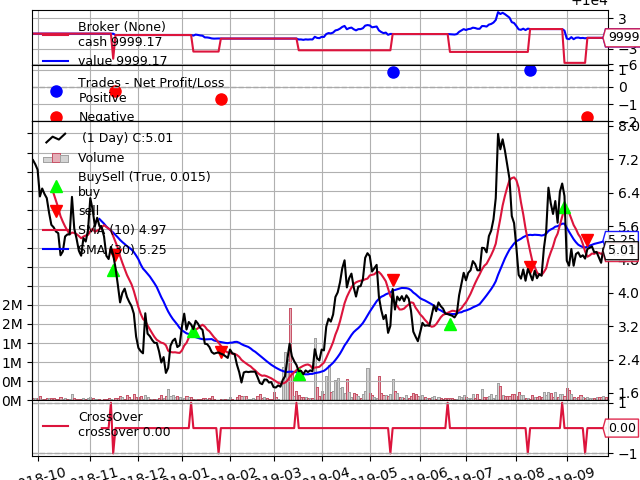

[[<Figure size 640x480 with 5 Axes>]]

In [7]:
cerebro = bt.Cerebro()

cerebro.adddata(data)
cerebro.addstrategy(SmaCross)
cerebro.run()
cerebro.plot()